In [1]:
import numpy as np

In [2]:
def loadDataSet():
    dataMat = []
    labelMat = []
    fr = open('testSet.txt')
    for line in fr.readlines():
        lineArr = line.strip().split()
        dataMat.append([1.0,float(lineArr[0]),float(lineArr[1])])
        labelMat.append(int(lineArr[2]))
    return dataMat , labelMat 

In [3]:
def sigmoid(inX):
    return 1.0 / (1 + np.exp(-inX))

In [4]:
def gradAsecnt(dataMatIn,classLabels):
    dataMatrix = np.array(dataMatIn)
    labelMat = np.matrix(classLabels).transpose()
    m , n = dataMatrix.shape
    alpha = 0.01
    maxCycles = 500
    weights = np.ones((n,1))
    for k in range(maxCycles):
        h = sigmoid(np.dot(dataMatrix,weights))
        error = (labelMat - h)
        a =  np.dot(dataMatrix.T,error)
        weights = weights + alpha *a 
    return weights

In [5]:
dataArr , labelMat = loadDataSet()
weights = gradAsecnt(dataArr , labelMat)

In [6]:
weights.shape,np.array(dataArr).shape

((3, 1), (100, 3))

In [7]:
import matplotlib.pyplot as plt

In [8]:
def plotBestFit(wei):
    weights = np.array(wei)
    dataMat,labelMat = loadDataSet()
    dataArr  = np.array(dataMat)
    n = dataArr.shape[0]
    xcord1 = []
    ycord1 = []
    xcord2 = []
    ycord2 = []
    for i in range(n):
        if int(labelMat[i]) == 1:
            xcord1.append(dataArr[i,1])
            ycord1.append(dataArr[i,2])
        else:
            xcord2.append(dataArr[i,1])
            ycord2.append(dataArr[i,2])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1 , ycord1 ,s=30,c='red',marker='s')
    ax.scatter(xcord2 , ycord2 ,s=30,c='green')
    x = np.array([-3.0,3.0,0.1])
    y = (-weights[0] - weights[1]*x ) / weights[2]
    ax.plot(x,y)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()
            

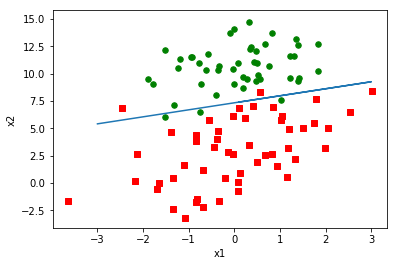

In [9]:
plotBestFit(weights)

In [10]:
def stocGradAscent0(dataMatrix,classLabels):
    m,n = dataMatrix.shape
    alpha = 0.01
    weights = np.ones(n)
    for i in range(m):
        h = sigmoid(np.sum(np.dot(dataMatrix[i] ,weights )))
        error = classLabels[i] - h
        weights = weights + alpha* error * dataMatrix[i]
    return np.array(weights)

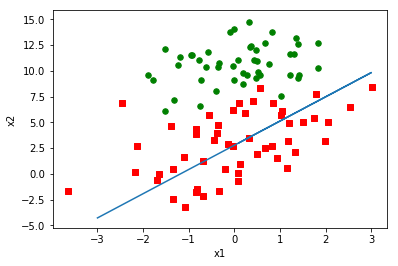

In [11]:
weights = stocGradAscent0(np.array(dataArr) , labelMat)

plotBestFit(weights)

In [12]:
def stocGradAscent1(dataMatrix,classLabels , numIter = 150):
    m,n = dataMatrix.shape
    weights = np.ones(n)
    for j in range(numIter):
        dataIndex = list(range(m))
        for i in range(m):
            alpha = 4 / (1.0 + j + i) + 0.01
            randIndex = int(np.random.uniform(0 , len(dataIndex)))
            h = sigmoid(np.sum(np.dot(dataMatrix[randIndex] ,weights )))
            error = classLabels[randIndex] - h
            weights = weights + alpha* error * dataMatrix[randIndex]
    return np.array(weights)

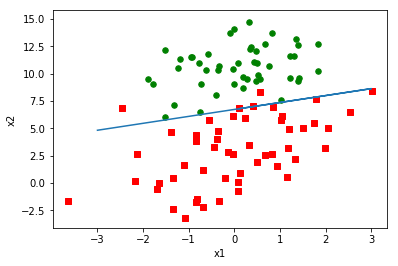

In [13]:
weights = stocGradAscent1(np.array(dataArr) , labelMat ,200)

plotBestFit(weights)

In [14]:
def classifyVector(inX,weights):
    prob = sigmoid(np.sum(inX * weights))
    if prob > 0.5:
        return 1.0
    else:
        return 0.0

In [29]:
def colicTest():
    frTrain = open('horseColicTraining.txt'); frTest = open('horseColicTest.txt')
    trainingSet = []; trainingLabels = []
    for line in frTrain.readlines():
        currLine = line.strip().split('\t')
        lineArr =[]
        for i in range(21):
            lineArr.append(float(currLine[i]))
        trainingSet.append(lineArr)
        trainingLabels.append(float(currLine[21]))
    trainWeights = stocGradAscent1(np.array(trainingSet), trainingLabels, 1000)
    errorCount = 0; numTestVec = 0.0
    for line in frTest.readlines():
        numTestVec += 1.0
        currLine = line.strip().split('\t')
        lineArr =[]
        for i in range(21):
            lineArr.append(float(currLine[i]))
        if int(classifyVector(np.array(lineArr), trainWeights))!= int(currLine[21]):
            errorCount += 1
    errorRate = (float(errorCount)/numTestVec)
    print ("the error rate of this test is: %f" % errorRate)
    return errorRate

In [30]:
def multiTest():
    numTests = 10; errorSum=0.0
    for k in range(numTests):
        errorSum += colicTest()
    print ("after %d iterations the average error rate is: %f" % (numTests, errorSum/float(numTests)))


In [31]:
multiTest()

D:\RUANJIAN\Anaconda3\Anaconda3_3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app


the error rate of this test is: 0.268657
the error rate of this test is: 0.447761
the error rate of this test is: 0.253731
the error rate of this test is: 0.298507
the error rate of this test is: 0.358209
the error rate of this test is: 0.253731
the error rate of this test is: 0.238806
the error rate of this test is: 0.268657
the error rate of this test is: 0.253731
the error rate of this test is: 0.328358
after 10 iterations the average error rate is: 0.297015
